### **Aim**  
The motive of this assignment is to make predictions using **Linear Regression**. To make sure you truly understand how the underlying algorithm works, you are to implement it from scratch.

### Generating the dataset  
Run the cell below to create the dataset. It further splits the available data into training and testing. Please do not edit this cell.


In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=20, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


### Visualizing the data  
Use `matplotlib` to visualize the given data.

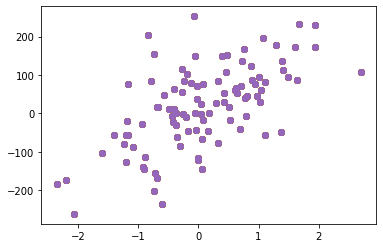

In [2]:
import matplotlib.pyplot as plt
for i in range(0,5):
  plt.scatter(X[:,1],y)
  plt.show
# Your code here

You should be able to see the linear relations between `y` and the features in vector `X`.

### Gradient Descent Review  
1. ####  Cost function
Define the `cost function` to measure the difference between predictions and target outputs. Here, we are working with first degree polynomial, so derivatives are easy to calculate. ( Linear function `y = wx +b` )  

$$Error = \frac{1}{N}\sum_{i=1}^N (y_i - \overline{y}_i)^2 = \frac{1}{N}\sum_{i=1}^N (y_i - (x_iw+b))^2 $$  

  where `N` is the number of samples  
    


2. #### Compute the derivative
$$\frac{\delta Error}{\delta w} = \frac{2}{N}\sum_{i=1}^N -x_i(y_i -(m  x_i +b ))  $$
$$\frac{\delta Error}{\delta b} = \frac{2}{N}\sum_{i=1}^N -(y_i -(m  x_i +b ))  $$
3. <h4>Update current parameters</h4>
$$ w:= w- learning\_rate \cdot \frac{\delta Error}{\delta w}   $$ 
$$ b:= b- learning\_rate \cdot \frac{\delta Error}{\delta b}   $$ 
4. <h4>Repeat until it fits good enough</h4>


### Model definition

Complete the functions in the class below. Hints provided at appropriate places.

In [3]:
import numpy as np

class LinearRegression:

    # The __init__ is called when we make any object of our class. Here, you are to specify the default values for 
    # Learning Rate, Number of Iterations, Weights and Biases. It doesn't return anything.
    # Hint: Google what a `self pointer` is and figure out how it can be used here.
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
       

          # Uncomment this when you're done with this function


    # The following function would be the heart of the model. This is where the training would happen. 
    # You're supposed to iterate and keep on updating the weights and biases according to the steps of Gradient Descent.
    def fit(self, X, y):
        n_samples, n_features = X.shape
         # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        # Gradient Descent code goes here
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

          # Uncomment this when you're done with this function
        
        
    # This function will be called after our model has been trained and we are predicting on unseen data
    # What is our prediction? Just return that
    def predict(self, X):
       y_fin = np.dot(X, self.weights) + self.bias
       return y_fin


        



### Initializing, Training & Predictions

In [4]:
# Now, we make an object of our custom class.

regressor = LinearRegression(learning_rate=0.01, n_iters=1000)# You may pass the custom parameters or let the default values take it ahead
regressor.fit(X_train, y_train)


# Call the fit method on the object to train (pass appropriate part of dataset)


# Now, let's see our what our model predicts
predictions = regressor.predict(X_test) # pass appropriate part of dataset

### Evaluate the model   

Return [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) & [R2 Score](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=%C2%AFy) from the functions below.

In [5]:
def mean_squared_error(y_true, y_pred):
       # return the mean squared error
        return np.mean((y_true - y_pred) ** 2) # Uncomment this when you're done with this function


def r2_score(y_true, y_pred):
      # return the r2 score
      corr_matrix = np.corrcoef(y_true, y_pred)
      corr = corr_matrix[0, 1]
      return corr ** 2  # Uncomment this when you're done with this function
          

mse = mean_squared_error(y_test, predictions) # Pass appropriate parts of dataset
print("MSE:", mse)

accu = r2_score(y_test, predictions) # Pass appropriate parts of dataset
print("Accuracy:", accu)

MSE: 390.6026570894989
Accuracy: 0.9637788781894968
